# Support Vector Machines

SVM sind ein flexibles und mächtiges ML-Modell. Man kann mit ihnen sowohl lineare als auch nicht-lineare Klassifikationsaufgaben, Regression und die Erkennung von Ausfreissern bewältigen.  
## Large Margin Klassifikation
Probiert eine möglichst breite Strasse zwischen die Kategorien zu bauen um diese zu separieren.
Diese Strasse wird durch die Punkte am Rande der Strasse gestützt/determiniert. Diese Punkte heissen support vectors (Stützvektoren).  

**Skalierung:**  
SVMs sind sehr empfindlich auf Skalierungen. Mit Skalierten Merkmalen können sie viel präzisere Vorhersagen treffen.

### Hard Margin Klassifikation
Hard Margin probiert eine möglichst breite Strasse zwischen den Kategorien zu erstellen.  
Die Hard Margin Klassifikation hat zwei Nachteile:
* Funktioniert nur, wenn die Daten linear separierbar sind
* Anfällig für Ausreisser (Margin-Verletzungen, dies sind Punkte, welche auf der Strasse liegen)

### Soft Margin Klassifikation
Findet im gegensatz zur Hard-Margin-Klassifikation eine gute Balance zwischen der Strassenbreite und der Anzahl von Margin-Verletzungen.  

**Hyperparameter C:**  
Dieser Hyperparameter steuert die Balance zwischen Strassenbreite und Margin-Verletzungen.
* kleiner Wert für C:
    * breite Strasse
    * mehr Margin-Verletzungen
* grosser Wert für C:
    * schmale Strasse
    * weniger Margin-Verletzungen

**Overfitting:**  
Wenn SVM overfittet, kann man es durch Senken von **C** regularisieren.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [2]:
iris = load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

## Mit LinearSVC und C=1
Regularisiert den Bias-Term (Achsenabschnitt). Daher sollten die Trainingsdaten zuvor durch Subtrahieren des Mittelwertes zentriert werden. Der StandardScaler macht dies automatisch.

In [3]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [4]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## Mit SVC und kernel='linear', C=1
Ist langsamer, vorallem bei grossen Datensätzen

In [6]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1))
])

In [7]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## Mit SGDClassifier und loss='hinge', alpha=1/(m*C)
* Verwendet das stochastische Gradientenverfahren
* Konvergiert nicht so schnell
* Geeignet bei grossen Datenmengen, Out-of-Core-Training und Online-Klassifikation

In [9]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_classifier', SGDClassifier(loss='hinge', alpha=1/(len(X))))
])

In [10]:
svm_clf.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd_classifier', SGDClassifier(alpha=0.006666666666666667, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Nichtlineare SVM-Klassifikation
Wenn die Daten nicht linear separierbar sind, kann man sie womöglich durch das Hinzufügen zusätzlicher Merkmale (polynomielle Merkmale) linear separierbar machen.

In [12]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [13]:
X, y = make_moons()

In [14]:
X.shape, y.shape

((100, 2), (100,))

In [15]:
X[48], y[48]

(array([-0.09602303,  0.99537911]), 0)

In [16]:
polynomial_svm = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

In [17]:
polynomial_svm.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

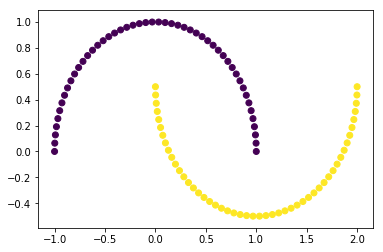

In [19]:
plt.scatter(X[:,0], X[:,1], c=y)

In [20]:
X_poly = PolynomialFeatures(degree=3).fit_transform(X)

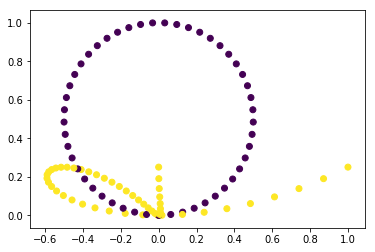

In [21]:
plt.scatter(X_poly[:, 4], X_poly[:, 5], c=y)

## Polynomieller Kernel
Polynome niedrigen Grades funktionieren nicht gut mit komplexen Daten aber höhergradige Polynome erzugen eine unmenge an Merkmalen, welche das Modell verlangsamen.

### Kernel-Trick
Mithilfe dieses Tricks kann dasselbe Ergebniss wie beim Hinzufügen polynomieller Merkmale erreicht werden, ohne diese explizit hinzuzufügen. Dadurch bleibt man von der explosionsartigen Steigerung der Anzahl Merkmale verschont.

**Overfitting:**  
Der polynomielle Grad muss gesenkt werden.  

**Underfitting:**  
Der polynomielle Grad muss erhöht werden.

**coef0:**  
Dieser Hyperparameter steuert, wie stark das Modell von den höhergradigen gegenüber den niedriggradigen Polynomialtermen beeinflusst wird.

In [22]:
poly_kernel_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [23]:
poly_kernel_svm.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

# Ähnlichkeitsbasierte Merkmale
Dies ist eine weitere Methode um neuen Merkmale zu berechnen. Es funktioniert mit einer Ähnlichkeitsfunktion.  

**Gausssche radiale Basisfunktion:**  
$\phi y(x, l) = exp -(y \| x-l\|^2)$

Landmarke 1: $x_1 = -2$  
Landmarke 2: $x_2 = 1$  
$y=0.3$  
Datenpunkt: $x_1 = -1$  
Dies ist eine glockenförmige Funktion die zwischen 0 (sehr weit von der Landmarke) und 1 (genau bei der Landmarke) liegt.

$x_2 = exp - (0.3 * 1^2) \approx 0.74$  
$x_3 = exp - (0.3 * 2^2) \approx 0.30$

**Wie werden die Landmarken ausgesucht?**  
Am einfachsten ist es, wenn man für jeden Datenpunkt eine Landmarke erzeugt. Dadurch wird aber aus einem Datensatz (m, n) ein Datensatz (m, m), wenn man die alten Merkmale weglässt.

# Gausssche RBF-Kernel
Dieser Kernel ermöglicht es, ein zu vielen ähnlichen Merkmalen äquivalentes Ergebnis zu erhalten, ohne diese tatsächlich hinzuzufügen. Dies wird durch den Kernel-Trick möglich.

**gamma ($\gamma$):**  
$\gamma$ verhält sich ein wenig wie ein Regularisierungsparameter.
* grosser Wert
    * Macht die glockenförmige Kurve schmaler
    * Verringert den Einfluss der einzelnen Datenpunkte
    * Macht die Entscheidungsgrenze unregelmässig
* tiefer Wert
    * Macht die glockenförmige Kurve breiter
    * Erhöt den Einflussbereich der einzelnen Datenpunkte
    * Macht die Entscheidungsgrenze weicher
    
**Overfitting:**  
Bei Overfitting muss man $\gamma$ verringern.

**Underfitting:**  
Bei Underfitting muss man $\gamma$ erhöhen.

### Spezialisierte Kernel
Es gibt noch spezialisiert Kernel, welche bei Datensätzen mit bestimmten Datenstrukturen zum Einsatz kommen.

**String-Kernels:**  
Diese Kernel sollte man verwenden, wenn man Texte oder DNA-Sequenzen klassifizieren möchte.

* string-subsequence-Kernel
* Levenshtein-Distanz Kernel

### Welchen Kernel soll ich verwenden?
Faustregel:
1. Linearen Kernel ausprobieren
    * LinearSVC ist schneller als SVC mit `kernel='linear'`
2. Ist der Datensatz nicht zu gross SGDClassifier ausprobieren
3. Gausschen RBF-Kernel ausprobieren

Wenn verfügbar, dann einen spezialisierten Kernel verwenden.

In [24]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

In [25]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [26]:
clf = rbf_kernel_svm_clf.named_steps['svm_clf']

In [27]:
clf.support_vectors_[:1]

array([[ 0.56412183, -0.2489385 ]])

# Vor- und Nachteile
|Klasse|zeitl. Komplexität|Out-of-Core|Skalierung nötig|Kernel-Trick|
|-|-|-|-|-|
|LinearSVC|$O(m\times n)$|Nein|Ja|Nein|
|SGDClassifier|$O(m\times n)$|Ja|Ja|Nein|
|SVC|$O(m^2\times n)$ bis $O(m^3\times n)$|Nein|Ja|Ja|

# SVM-Regression
Bei der Regression wird genau das Gegenteil von dem Versucht was bei der SVM-Klassifikation gemacht wird.  
Es wird versucht, möglichst viele Datenpunkte auf der Strasse zu platzieren und Grenzverletzungen (Punkte neben der Strasse) werden minimiert. Hier wird die Strasse aber auch mit den Labels erstellt und nicht nur mit den Merkmalen wie bei der Klassifikation.

**epsilon ($\epsilon$):**  
Dieser Hyperparameter legt das Margin fest. Dies bestimmt die breite der Strasse.
* hohes Margin
    * breite Strasse
* tiefes Margin
    * schmale Strasse
    
Werden weitere Trainingsdatenpunkte innerhalb der Strasse (des Margins) hinzugefügt, so wird die Vorhersage der Modells **nicht** beeinflusst. Es ist **$\epsilon$-insensitiv**.

**Skalierung und Zentrieren:**  
Auch bei der SVM-Regression sollten die Daten sklaliert und zentriert werden.

Die Klassen für SVM-Regression heissen alle fast gleich (R statt C) und teilen die gleichen Eigenschaften.

In [28]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression

In [29]:
X, y = make_regression()

In [30]:
svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', LinearSVR(epsilon=1.5))
])
svm_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [31]:
svm_reg.predict(X[:2])

array([  -3.10491418, -123.44384387])

In [32]:
y[:2]

array([-107.53886074, -121.93327419])

In [33]:
from sklearn.svm import SVR

In [34]:
svm_poly_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='poly', degree=2, C=100, epsilon=0.1))
])
svm_poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [35]:
svm_poly_reg.predict(X[:2])

array([ -91.39099   , -121.83318585])

# Übersprungen: Hinter den Kulissen (S.156-S.164)

# Aufgaben

**Was ist die Support Vector Machines zugrunde liegende Idee?**  
Es wird versucht eine möglichst breite Strasse zwischen die Kategorien zu bauen um diese zu separieren.

**Was ist ein Stützvektor?**  
Ein Stützvektor besteht aus allen Punkten, welche am Rande der separierenden Strasse liegen.

**Warum ist es wichtig, beim Verwenden von SVMs die Eingabedaten zu skalieren?**  
Ohne eine Skalierung ist die Entscheidungsgrenze schlechter (es kann keine breite Strasse gebaut werden). Die Skalierung zb. mit dem StandardScaler verbessert daher das Ergebnis.

**Kann ein SVM-Klassifikator einen Konfidenzwert ausgeben, wenn er einen Datenpunkt klassifiziert? Wie sieht es mit einer Wahrscheinlichkeit aus?**  
* Konfidenzwert:
    * Anteil einer Menge
* Wahrscheinlichkeit:
    * Ja es können Wahrscheinlichkeiten berechnet werden. Mit sklearn muss man den Parameter `probability=True` angeben.

**Sollten Sie die primale oder die duale From des SVM-Problems verwenden, um einModell mit Millionen Datenpunkten und Hunderten Merkmale zu trainieren?**  
?

**Nehmen wir an, Sie hätten einen SVM-Klassifikator mit RBF-Kernel trainiert. Es seiht so aus, als würde Underfitting der Trainingsdaten vorliegen: Sollten Sie $\gamma$ (gamma) erhöhen oder senken? Wie sieht es mit C aus?**  
* $\gamma$
    * Gamma muss erhöht werden um die Regularisierung zu senken damit das Modell besser aus den Daten lernen kann.
* C
    * Bei Underfitting muss C erhöht werden. Es macht die Strassen schmaler und verringert die Margin-Fehler.

**Wie sollten Sie die QP-Parameter(H, f, A und b) setzen, um ein lineares SVM-Klassifikationsproblem mit Soft-Margin mit einem herkömmlichen QP-Solver zu lösen?**  
?

**Trainieren Sie einen LinearSVC auf linear separierbaren Daten. Trainieren Sie anschliessend einen SVC und einen SGDClassifier auf dem gleichen Datensatz. Schauen Sie, ob Sie beide dazu bringen können, ein in etwa gleiches Modell zu berechnen.**  
siehe LinearSVC / SVC / SGDClassifier

**Trainieren Sie einen SVM-Klassifikator auf dem MNIST-Datensatz. Da SVM-Klassifikatoren binäre Klassifikatoren sind, müssen Sie die One-versus-All-Strategie einsetzen, um alle zehn Ziffern zu klassifizieren. Sie müssen eventuell zur Optimierung der hyperparameter kleinere Datensätze zur Validierung verwenden, um den Vorgang zu beschleunigen. Was für eine Genauigkeit erreichen Sie?**  
Siehe MNIST

**Trainieren Sie einen SVM-Klassifikator auf dem Datensatz zu Immobilienpreisen in Kalifornien.**  
Siehe Housing

# LinearSVC / SVC / SGDClassifier

In [36]:
from sklearn.datasets import load_iris

In [37]:
iris = load_iris()

In [38]:
X, y = iris['data'], iris['target']

In [39]:
X_new = X[:,(2,3)]

In [40]:
y_new = (y == 2).astype(int)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2)

In [43]:
X_train.shape, y_train.shape

((120, 2), (120,))

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [45]:
linear_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(C=1, loss='hinge'))
])

In [46]:
linear_svc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [47]:
from sklearn.metrics import precision_score, recall_score

In [48]:
precision_score(y_test, linear_svc.predict(X_test))

1.0

In [49]:
recall_score(y_test, linear_svc.predict(X_test))

1.0

In [50]:
from sklearn.svm import SVC

In [51]:
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear', C=1))
])

In [52]:
svc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [53]:
precision_score(y_test, svc.predict(X_test))

1.0

In [54]:
recall_score(y_test, svc.predict(X_test))

1.0

In [55]:
from sklearn.linear_model import SGDClassifier

In [56]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_classifier', SGDClassifier(loss='hinge', alpha=1/(len(X_train))))
])

In [57]:
svm_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd_classifier', SGDClassifier(alpha=0.008333333333333333, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [58]:
precision_score(y_test, svm_clf.predict(X_test))

1.0

In [59]:
recall_score(y_test, svm_clf.predict(X_test))

1.0

# MNIST

In [60]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [61]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [62]:
X_train.shape

(60000, 784)

In [63]:
mnist_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_classifier', SGDClassifier(loss='hinge', alpha=1/(len(X_train))))
])

In [64]:
mnist_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd_classifier', SGDClassifier(alpha=1.6666666666666667e-05, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [65]:
y_train[0], mnist_clf.predict(X_train[:1])[0]

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(5, 5)

In [66]:
precision_score(y_test, mnist_clf.predict(X_test), average='micro')

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.916

In [67]:
recall_score(y_test, mnist_clf.predict(X_test), average='micro')

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.916

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test, mnist_clf.predict(X_test))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.916

# Housing

In [70]:
import pickle

In [71]:
with open('datasets/housing/X_prepared.pickle', 'rb') as file:
    X = pickle.load(file)
with open('datasets/housing/y_prepared.pickle', 'rb') as file:
    y = pickle.load(file)

In [72]:
X.shape, y.shape

((16512, 8), (16512,))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
from sklearn.linear_model import SGDRegressor

In [79]:
housing_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_classifier', SGDRegressor(alpha=1/(len(X_train))))
])

In [83]:
from sklearn.cross_validation import cross_val_score

In [109]:
housing_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd_classifier', SGDRegressor(alpha=7.570595805889923e-05, average=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, penalty='l2', power_t=0.25, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [89]:
score = cross_val_score(housing_clf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/skl

In [90]:
score.mean()

-1.6377522434646123e+21